# Multi-Layer Perceptron (MLP) Classifier Example with Plots

This notebook demonstrates training an MLP Classifier using the scikit-learn library with added plots for data visualization and loss curves.

## Step 1: Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Step 2: Load the Digits dataset

In [2]:
digits = load_digits()
X = digits.data
y = digits.target
print(f'Data Shape: {X.shape}')
print(f'Target Shape: {y.shape}')

Data Shape: (1797, 64)
Target Shape: (1797,)


### Visualizing some sample digits

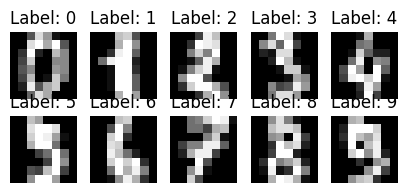

In [8]:

fig, axes = plt.subplots(2, 5, figsize=(5, 2))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.show()


## Step 3: Split the dataset into training and test sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'Training set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')

Training set size: (1257, 64)
Test set size: (540, 64)


## Step 4: Standardize the features

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print('Data after scaling:')
# print(X_train[:5])

Data after scaling:


## Step 5: Initialize and train the MLP Classifier

In [15]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, alpha=0.0001, solver='adam', random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=42)

### Training Loss Curve

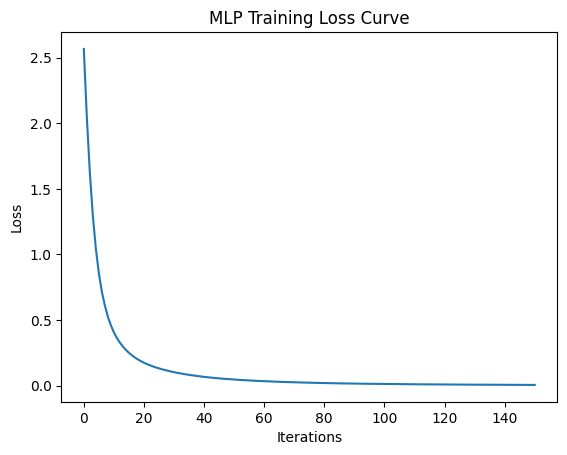

In [16]:

plt.plot(mlp.loss_curve_)
plt.title('MLP Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


## Step 6: Make predictions on the test set

In [18]:
y_pred = mlp.predict(X_test)
print(f'Predictions: {y_pred[:10]}')

Predictions: [6 9 3 7 2 1 5 2 5 2]


## Step 7: Evaluate the model

In [19]:
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
print('Classification Report:')
print(classification_report_result)
print('Confusion Matrix:')
print(confusion_matrix_result)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       0.98      1.00      0.99        47
           3       1.00      0.94      0.97        54
           4       0.98      1.00      0.99        60
           5       0.97      0.98      0.98        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.93      0.98      0.95        43
           9       0.98      0.97      0.97        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

Confusion Matrix:
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 51  0  1  0  0  1  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 65  1  0  0  0]
 [